In [1]:
import pandas as pd
import datetime

# 元となる脆弱性のデータ

In [2]:
vul_origin_data = pd.read_csv("./../vulnerability/cargo_vul_data.csv",delimiter=",")
vul_origin_data

,vulnerability_name,package_name,version_range,published_at,project_id
0,Integer Overflow in Chunked Transfer-Encoding,hyper,>=0 <0.14.10,2021-07-12T16:55:37Z,31056
1,Lenient Parsing of Content-Length Header When ...,hyper,>=0 <0.14.10,2021-07-12T16:54:20Z,31056
2,SMTP command injection in lettre,lettre,>=0.7.0 <0.9.6,2021-07-12T17:03:27Z,1056639
3,Link following in tar,tar,>=0 <0.4.16,2021-08-25T20:43:54Z,31448
4,Data races in rusqlite,rusqlite,>=0 <0.23.0,2021-08-25T20:47:57Z,31334
...,...,...,...,...,...
382,Cap'n Proto and its Rust implementation vulner...,capnp,>=0.15.0 <0.15.2 || >=0.14.0 <0.14.11 || >=0.1...,2022-12-05T17:58:16Z,30819
383,Tokio reject_remote_clients configuration may ...,tokio,>=1.7.0 <1.18.4 || >=1.19.0 <1.20.3 || >=1.7.0...,2023-01-06T21:40:58Z,1563316
384,bzip2 allows attackers to cause a denial of se...,bzip2,>=0 <0.4.4,2023-01-10T03:30:29Z,30815
385,webbrowser-rs allows attackers to access arbit...,webbrowser,>=0 <0.8.3,2023-01-13T21:30:26Z,1114327


## 重複した脆弱性データがないか確認

In [3]:
vul_origin_data.groupby(["vulnerability_name", "package_name", "project_id"]).size().sort_values(ascending=False)

vulnerability_name                             package_name       project_id
 Uncaught Exception in libpulse-binding        libpulse-binding   2602484       1
Use after free in heapless                     heapless           2264408       1
Uncontrolled recursion in rust-yaml            yaml-rust          814794        1
Uncontrolled recursion in ammonia              ammonia            966926        1
Uncontrolled memory consumption in protobuf    protobuf           31286         1
                                                                               ..
Incorrect implementation in streebog           streebog           1842414       1
Incorrect hash in sha2                         sha2               1441209       1
Incorrect check on buffer length in rand_core  rand_core          2448837       1
Incorrect buffer size in crossbeam-channel     crossbeam-channel  2544925       1
wee_alloc is Unmaintained                      wee_alloc          2603364       1
Length: 387, dtype: i

# 脆弱性影響の解析後データを分析

In [4]:
vul_data = pd.read_csv("./affected_packages_cargo_with_all.csv",delimiter=",")
vul_data

,project_id,vul_project_id,vul_start_datetime,vul_end_datetime,vul_start_timestamp,vul_end_timestamp,compliantType,vul_start_dependency_compliant,vul_start_version,vul_deps,vul_total_count,source_rank
0,941138,877968,2015-08-24 02:41:26 +0000 UTC,2023-02-01 14:22:04.566862 +0900 JST m=+0.4541...,1440384086,1675228924,5,*,0.4.0,0,1,3
1,942327,877968,2015-08-24 20:23:10 +0000 UTC,2023-02-01 14:22:04.57459 +0900 JST m=+0.46189...,1440447790,1675228924,5,^0.4,0.4.0,0,1,22
2,1085021,877968,2015-11-14 12:21:11 +0000 UTC,2023-02-01 14:22:04.580071 +0900 JST m=+0.4673...,1447503671,1675228924,5,~0.6,0.6.0,0,1,0
3,1127322,877968,2015-12-20 21:38:33 +0000 UTC,2023-02-01 14:22:04.587125 +0900 JST m=+0.4744...,1450647513,1675228924,5,^0.6,0.6.1,0,1,37
4,1139004,877968,2016-01-02 10:12:17 +0000 UTC,2023-02-01 14:22:04.590695 +0900 JST m=+0.4780...,1451729537,1675228924,5,^0.6,0.6.1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29249,4773340,31056,2020-01-01 06:28:01 +0000 UTC,2023-02-01 14:26:00.92778 +0900 JST m=+236.820...,1577860081,1675229160,5,^0.13.1,0.13.1,0,1,3
29250,4775999,31056,2020-01-03 08:04:24 +0000 UTC,2023-02-01 14:26:00.929381 +0900 JST m=+236.82...,1578038664,1675229160,5,^0.12,0.12.35,0,1,0
29251,3781289,31056,2020-01-03 09:53:44 +0000 UTC,2023-02-01 14:26:00.934255 +0900 JST m=+236.82...,1578045224,1675229160,5,^0.12,0.12.35,0,1,0
29252,4776655,31056,2020-01-03 17:53:23 +0000 UTC,2023-02-01 14:26:00.935924 +0900 JST m=+236.82...,1578074003,1675229160,5,^0.13.1,0.13.1,0,1,0


## 影響を与えたパッケージ数のランキング

In [5]:
vul_data.groupby("vul_project_id").size().sort_values(ascending=False)

vul_project_id
31056      6636
2449131    4424
31311      2117
30838      1915
752427     1225
           ... 
3337548       1
3416351       1
3417295       1
3448320       1
4721836       1
Length: 183, dtype: int64

## 影響を受けた期間を計算

- 脆弱性受け終わりの時刻が現在時刻(2023年1月1日)付近であれば、脆弱性受け終わりの時刻を'2020-01-12 00:00:00'に上書きする
    - データセットの構築時の最新時刻に揃える
    - データセット: https://libraries.io/data

In [6]:
parsed_datetime = datetime.datetime(2023, 1, 1, 0, 0, 0, 0)
vul_end_last_datetime = datetime.datetime(2020, 1, 12, 0, 0, 0, 0)

vul_data["vul_end_datetime"] = vul_data["vul_end_datetime"].where(vul_data["vul_end_timestamp"] < parsed_datetime.timestamp(), vul_end_last_datetime.strftime('%Y-%m-%d %H:%M:%S'))
vul_data["vul_end_timestamp"] = vul_data["vul_end_timestamp"].where(vul_data["vul_end_timestamp"] < parsed_datetime.timestamp(), vul_end_last_datetime.timestamp())
vul_data["vul_months"] = (vul_data["vul_end_timestamp"] - vul_data["vul_start_timestamp"]) / (3600 * 24 * 30)
vul_data
vul_data["status"] = vul_data["vul_end_timestamp"] < vul_end_last_datetime.timestamp()

## データの分布


### 脆弱性の存続期間

<AxesSubplot: >

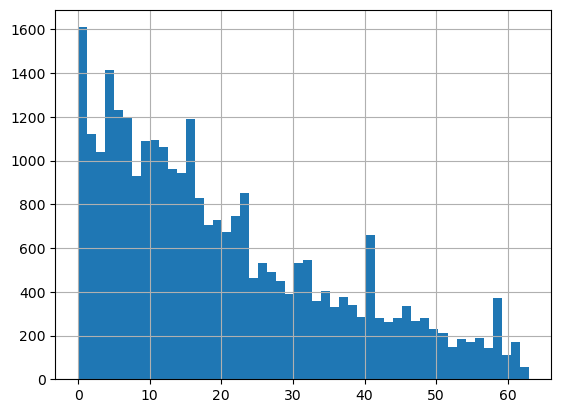

In [7]:
vul_data["vul_months"].hist(bins=50)

### semver準拠タイプごとの影響を受けたパッケージ数

- 1: (本番開発リリース)準拠している
- 2: (本番開発リリース)semverより緩い制約
- 3: (本番開発リリース)semverより厳しい制約
- 4: (初期開発リリース)準拠している
- 5: (初期開発リリース)semverより緩い制約

In [8]:
vul_data.groupby("compliantType").size()

compliantType
1     1524
2        1
3       39
4      199
5    27491
dtype: int64

# サバイバル分析

- ドキュメント: https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.nonparametric.kaplan_meier_estimator.html
    - Kaplan-Meier推定
        - https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%97%E3%83%A9%E3%83%B3%EF%BC%9D%E3%83%9E%E3%82%A4%E3%83%A4%E3%83%BC%E6%8E%A8%E5%AE%9A%E9%87%8F
    - 打ち切りデータもあってよい

In [9]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
import numpy as np

In [20]:
vul_data_compliant = vul_data[vul_data["compliantType"] == 1]
vul_data_permissive = vul_data[vul_data["compliantType"] == 2]
vul_data_restrictive = vul_data[vul_data["compliantType"] == 3]
vul_data_compliant_pre = vul_data[vul_data["compliantType"] == 4]
vul_data_permissive_pre = vul_data[vul_data["compliantType"] == 5]

### 生存関数

- 期間が長くなっても、Compliantな脆弱性が他に比べて生き残っている

Text(0.5, 0, 'time $t$')

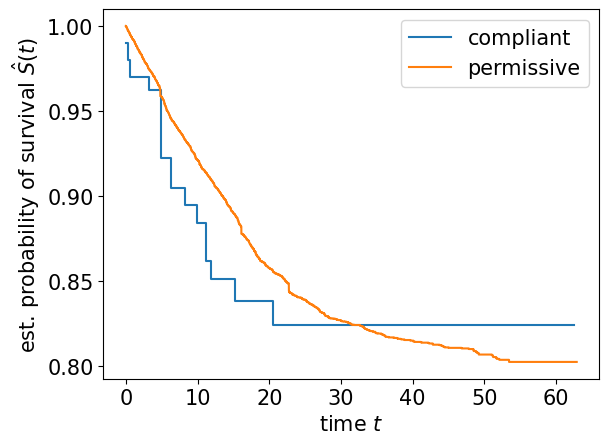

In [21]:
cph_compliant_pre = CoxPHFitter()
cph_compliant_pre.fit(pd.concat([vul_data_compliant_pre["vul_months"], vul_data_compliant_pre["status"].map(lambda x: 1 if x else 0),
                             ], axis=1), "vul_months", "status",
                  robust=True)
survival_f_compliant_pre = cph_compliant_pre.predict_survival_function(np.arange(0, 100, 1000))


cph_permissive_pre = CoxPHFitter()
cph_permissive_pre.fit(pd.concat([vul_data_permissive_pre["vul_months"], vul_data_permissive_pre["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_permissive = cph_permissive_pre.predict_survival_function(np.arange(0, 100, 1000))

# cph_restrictive = CoxPHFitter()
# cph_restrictive.fit(pd.concat([vul_data_restrictive["vul_months"], vul_data_restrictive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
# survival_f_restrictive = cph_restrictive.predict_survival_function(np.arange(0, 100, 1000))


plt.step(survival_f_compliant_pre.index, survival_f_compliant_pre[0], where="post", label="compliant")
plt.step(survival_f_permissive.index, survival_f_permissive[0], where="post", label="permissive")
# plt.step(survival_f_restrictive.index, survival_f_restrictive[0], where="post", label="restrictive")

plt.legend()

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

Text(0.5, 0, 'time $t$ [month]')

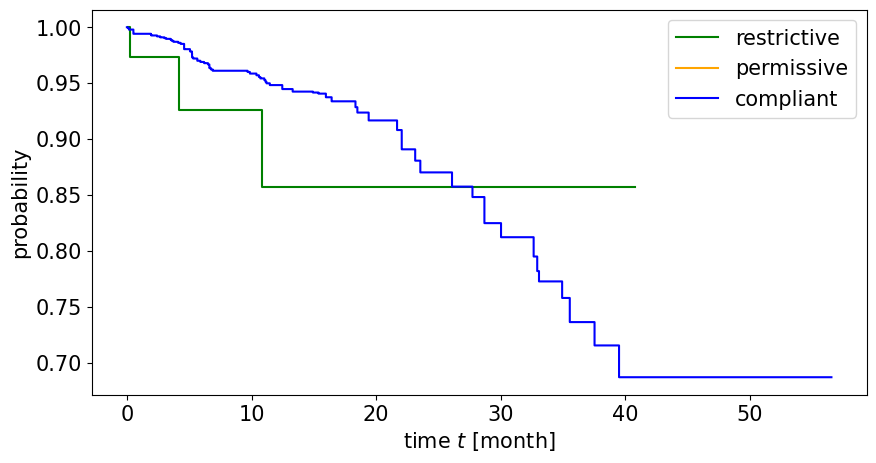

In [12]:
cph_compliant = CoxPHFitter()
cph_compliant.fit(pd.concat([vul_data_compliant["vul_months"], vul_data_compliant["status"].map(lambda x: 1 if x else 0),
                             vul_data_compliant["project_id"]
                             ], axis=1), "vul_months", "status",
                  weights_col="project_id",
                  robust=True)
survival_f_compliant = cph_compliant.predict_survival_function(np.arange(0, 100, 1000))


cph_permissive = CoxPHFitter()
cph_permissive.fit(pd.concat([vul_data_permissive["vul_months"], vul_data_permissive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_permissive = cph_permissive.predict_survival_function(np.arange(0, 100, 1000))

cph_restrictive = CoxPHFitter()
cph_restrictive.fit(pd.concat([vul_data_restrictive["vul_months"], vul_data_restrictive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_restrictive = cph_restrictive.predict_survival_function(np.arange(0, 100, 1000))

plt.rcParams["font.size"] = 15
plt.figure(figsize=[10, 5])
plt.step(survival_f_restrictive.index, survival_f_restrictive[0], where="post", label="restrictive", color="green")
plt.step(survival_f_permissive.index, survival_f_permissive[0], where="post", label="permissive", color="orange")
plt.step(survival_f_compliant.index, survival_f_compliant[0], where="post", label="compliant", color="blue")

plt.legend()

plt.ylabel("probability")
plt.xlabel("time $t$ [month]")

## 準拠タイプごとに脆弱性影響の生存期間を分析

### Compliant

In [22]:
vul_data_compliant_pre["vul_months"].describe()

count    199.000000
mean      15.962350
std       18.470831
min        0.003811
25%        2.642523
50%        7.058533
75%       20.985497
max       62.593595
Name: vul_months, dtype: float64

In [26]:
vul_data_compliant_pre

,project_id,vul_project_id,vul_start_datetime,vul_end_datetime,vul_start_timestamp,vul_end_timestamp,compliantType,vul_start_dependency_compliant,vul_start_version,vul_deps,vul_total_count,source_rank,vul_months,status
145,30821,30819,2014-11-20 19:36:41 +0000 UTC,2020-01-12 00:00:00,1416512201,1578754800,4,^0.0.1,0.0.1,0,1,0,62.593595,False
146,30822,30819,2014-11-20 19:41:48 +0000 UTC,2020-01-12 00:00:00,1416512508,1578754800,4,^0.0.1,0.0.1,0,1,15,62.593477,False
167,4220687,30819,2019-07-09 16:46:55 +0000 UTC,2020-01-12 00:00:00,1562690815,1578754800,4,= 0.10.0,0.10.0,0,1,0,6.197525,False
328,4532005,778946,2019-10-12 02:21:20 +0000 UTC,2020-01-12 00:00:00,1570846880,1578754800,4,= 0.15.3,0.15.3,0,1,2,3.050895,False
1952,2716720,2449131,2018-04-06 16:00:00 +0000 UTC,2020-01-12 00:00:00,1523030400,1578754800,4,= 0.1.1,0.1.1,0,1,0,21.498611,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27598,31053,31056,2014-11-22 04:43:03 +0000 UTC,2020-01-12 00:00:00,1416631383,1578754800,4,^0.0.1,0.0.1,0,1,6,62.547615,False
27606,31288,31056,2014-12-22 10:26:42 +0000 UTC,2020-01-12 00:00:00,1419244002,1578754800,4,^0.0.16,0.0.16,0,1,0,61.539660,False
28146,1742060,31056,2016-11-04 16:05:12 +0000 UTC,2020-01-12 00:00:00,1478275512,1578754800,4,= 0.9.10,0.9.10,0,1,30,38.765157,False
28152,1846533,31056,2016-11-13 11:58:46 +0000 UTC,2020-01-12 00:00:00,1479038326,1578754800,4,= 0.9.12,0.9.12,0,1,0,38.470862,False


<AxesSubplot: >

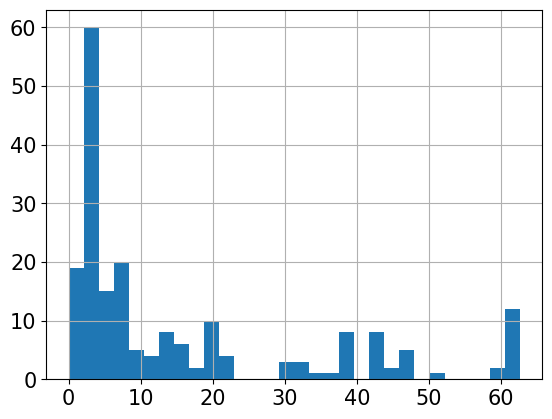

In [23]:
vul_data_compliant_pre["vul_months"].hist(bins=30)

### Permissive

- Compliantより生存期間が長い
    - なんで？

In [24]:
vul_data_permissive_pre["vul_months"].describe()

count    27491.000000
mean        20.831552
std         15.961124
min         -0.046155
25%          7.601941
50%         16.812175
75%         31.434712
max         62.912029
Name: vul_months, dtype: float64

<AxesSubplot: >

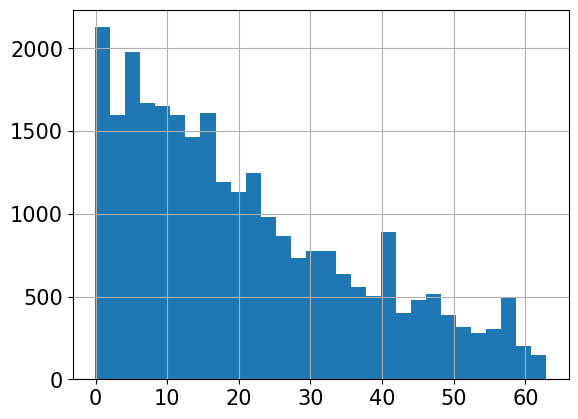

In [25]:
vul_data_permissive_pre["vul_months"].hist(bins=30)